In [5]:
#Importowanie wymaganych bibliotek
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import scipy
import scipy.io as sio
import pandas as pd
from collections import Counter
from google.colab import drive
from scipy.signal import spectrogram
from scipy.signal import periodogram
from scipy.signal import stft
from scipy.io import wavfile
import IPython.display as ipd
import random as python_random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv1D, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import to_categorical

In [6]:
# Ustawienie ziarna losowości dla powtarzalności wyników
def set_seeds(seed=42):
    np.random.seed(seed)
    python_random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

set_seeds()

In [7]:
# Podłączenie Dysku Google
drive.mount('/content/drive')

# Ścieżka do folderu z danymi po rozpakowaniu
folder_path = '/content/drive/My Drive/Projekt praca magisterska'

# Sprawdzenie zawartości folderu z plikami audio
#print("Lista plików w folderze:", os.listdir(audio_files)[:10]) # Wyświetla pierwsze 10 plików

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
audio_files = os.listdir(folder_path)
print("Lista plików w folderze:", os.listdir(folder_path)) # Wyświetla pierwsze 10 plików
print(audio_files[10])
print(len(audio_files))

Lista plików w folderze: ['31_auto.wav', '41_auto.wav', '49_auto.wav', '5_auto.wav', '12_auto.wav', '13_auto.wav', '14_auto.wav', '16_auto.wav', '17_auto.wav', '11_ruchuliczny.wav', '133_ruchuliczny.wav', '143_ruchuliczny.wav', '151_ruchuliczny.wav', '19_auto.wav', '2_ruchuliczny.wav', '15_ruchuliczny.wav', '108_ruchuliczny.wav', '25_ruchuliczny.wav', '90_auto.wav', '60_ruchuliczny.wav', '72_ruchuliczny.wav', '104_ruchuliczny.wav', '20_auto.wav', '130_ruchuliczny.wav', '22_auto.wav', '87_auto.wav', '131_ruchuliczny.wav', '132_ruchuliczny.wav', '134_ruchuliczny.wav', '136_ruchuliczny.wav', '137_ruchuliczny.wav', '139_ruchuliczny.wav', '141_ruchuliczny.wav', '142_ruchuliczny.wav', '21_auto.wav', '18_auto.wav', '23_auto.wav', '25_auto.wav', '88_auto.wav', '26_auto.wav', '27_auto.wav', '28_auto.wav', '29_auto.wav', '30_auto.wav', '32_auto.wav', '33_auto.wav', '35_auto.wav', '36_auto.wav', '37_auto.wav', '38_auto.wav', '39_auto.wav', '146_ruchuliczny.wav', '40_auto.wav', '42_auto.wav', '43_

500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

<BarContainer object of 2 artists>

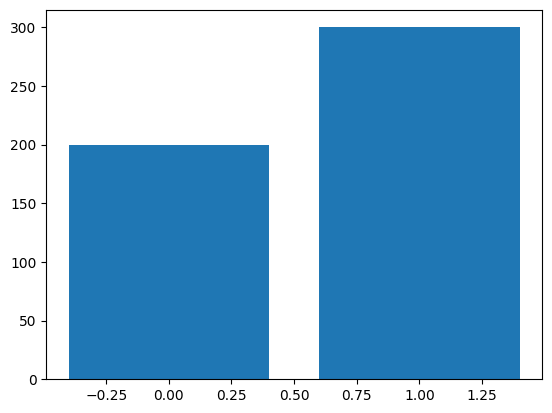

In [9]:
labels = np.zeros(len(audio_files))
print(len(labels))

for count,value in enumerate(audio_files):
  if 'auto' in value:
    labels[count] = 0
  elif 'ruchuliczny' in value:
    labels[count] = 1


print(labels)

counter_mine = Counter(labels)
plt.bar(counter_mine.keys(), counter_mine.values())

In [10]:
df_labels = pd.DataFrame({"label": labels})
df_labels["name"] = audio_files
print(df_labels.values)

df_labels

[[0.0 '31_auto.wav']
 [0.0 '41_auto.wav']
 [0.0 '49_auto.wav']
 [0.0 '5_auto.wav']
 [0.0 '12_auto.wav']
 [0.0 '13_auto.wav']
 [0.0 '14_auto.wav']
 [0.0 '16_auto.wav']
 [0.0 '17_auto.wav']
 [1.0 '11_ruchuliczny.wav']
 [1.0 '133_ruchuliczny.wav']
 [1.0 '143_ruchuliczny.wav']
 [1.0 '151_ruchuliczny.wav']
 [0.0 '19_auto.wav']
 [1.0 '2_ruchuliczny.wav']
 [1.0 '15_ruchuliczny.wav']
 [1.0 '108_ruchuliczny.wav']
 [1.0 '25_ruchuliczny.wav']
 [0.0 '90_auto.wav']
 [1.0 '60_ruchuliczny.wav']
 [1.0 '72_ruchuliczny.wav']
 [1.0 '104_ruchuliczny.wav']
 [0.0 '20_auto.wav']
 [1.0 '130_ruchuliczny.wav']
 [0.0 '22_auto.wav']
 [0.0 '87_auto.wav']
 [1.0 '131_ruchuliczny.wav']
 [1.0 '132_ruchuliczny.wav']
 [1.0 '134_ruchuliczny.wav']
 [1.0 '136_ruchuliczny.wav']
 [1.0 '137_ruchuliczny.wav']
 [1.0 '139_ruchuliczny.wav']
 [1.0 '141_ruchuliczny.wav']
 [1.0 '142_ruchuliczny.wav']
 [0.0 '21_auto.wav']
 [0.0 '18_auto.wav']
 [0.0 '23_auto.wav']
 [0.0 '25_auto.wav']
 [0.0 '88_auto.wav']
 [0.0 '26_auto.wav']
 [0.0 '2

label          name
0      0.0   31_auto.wav
1      0.0   41_auto.wav
2      0.0   49_auto.wav
3      0.0    5_auto.wav
4      0.0   12_auto.wav
..     ...           ...
495    0.0  171_auto.wav
496    0.0  172_auto.wav
497    0.0  190_auto.wav
498    0.0  162_auto.wav
499    0.0  163_auto.wav

[500 rows x 2 columns]

In [11]:
file_path = '/content/drive/My Drive/Projekt praca magisterska/26_auto.wav'
file_name = os.path.basename(file_path)
print("Nazwa wgranego pliku dźwiękowego: ",file_name)
os.chdir(folder_path)
print("Lokalizacja wgranego pliku: ", os.getcwd())
#Wgrywanie pliku do dalszej analizy
fs, audio_data = wavfile.read(file_name)
print(f"Liczba kanałów audio = {audio_data.shape}")
length = audio_data.shape[0] / fs
print("Częstotliwość próbkowania:", fs)
print("Długość audio pliku:",length,'sek')


Nazwa wgranego pliku dźwiękowego:  26_auto.wav
Lokalizacja wgranego pliku:  /content/drive/My Drive/Projekt praca magisterska
Liczba kanałów audio = (224283,)
Częstotliwość próbkowania: 48000
Długość audio pliku: 4.6725625 sek


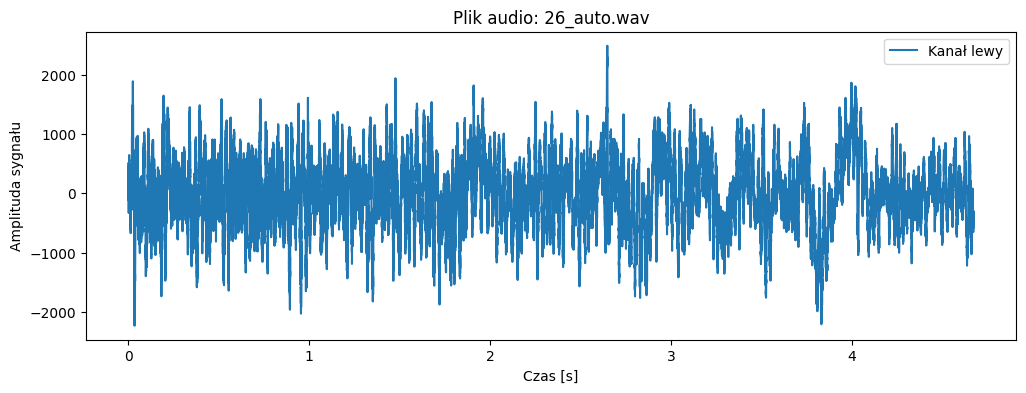

In [12]:
# Wizualizacja przebiegu fali dźwiękowej
timee = np.linspace(0., length, audio_data.shape[0])
plt.figure(figsize=(12, 4))
plt.plot(timee, audio_data, label="audio")
plt.legend(["Kanał lewy", "Kanał prawy"], loc = 'upper right')
plt.title(f'Plik audio: '+ file_name)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda sygnału")
plt.show()

In [13]:
# Odtwarzanie dźwięku
print(f'Odtwarzanie wybranego pliku: ',file_name)
signal,fs = librosa.load(file_name)
ipd.display(ipd.Audio(signal, rate=fs))
#print(fs)

Odtwarzanie wybranego pliku:  26_auto.wav


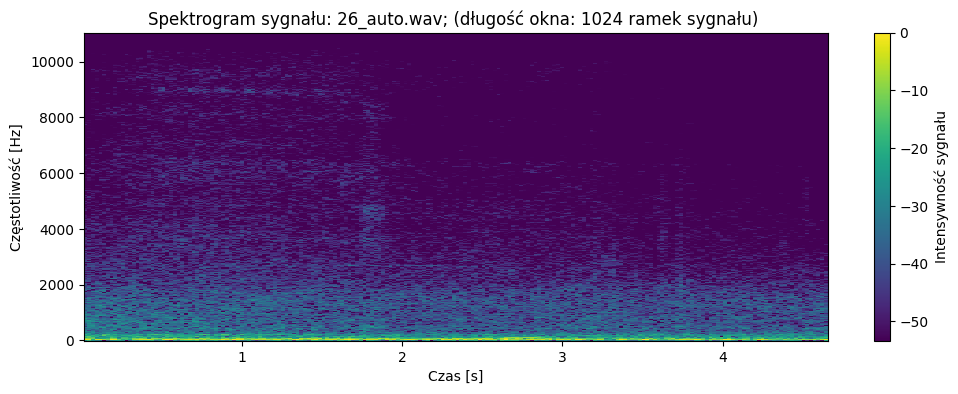

Wymiary spektrogramu:  (513, 200)


In [14]:
#Budowa spektrogramu, z wybranym oknem; czyli wizualizacja energii sygnału w danym paśmie częśtotliwości w czasie

plt.figure(figsize=(12,4))
f, t, Sxx = spectrogram(signal, fs= fs, nperseg=1024, noverlap=512)
Sxx_db = librosa.power_to_db(Sxx, ref=np.max)
plt.pcolormesh(t, f, Sxx_db)
plt.colorbar(label='Intensywność sygnału')
plt.ylabel('Częstotliwość [Hz]')
#plt.ylim([0,100])
plt.xlabel('Czas [s]')
plt.title('Spektrogram sygnału: '+ file_name + '; (długość okna: ' + str(1024) + ' ramek sygnału) ')
plt.show()

print("Wymiary spektrogramu: ", np.shape(Sxx))

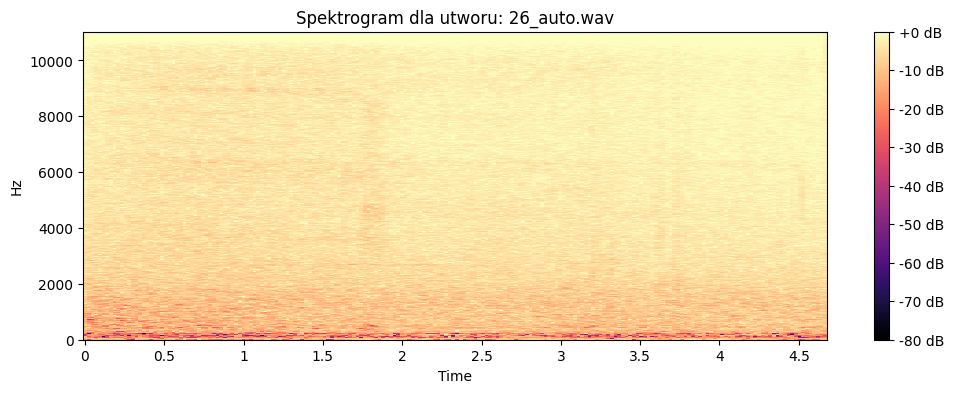

(1025, 202)


In [15]:
# Funkcja do tworzenia spektrogramu
def create_spectrogram(audio_file, fs= fs, n_fft=2048, hop_length=1024):
    data, fs = librosa.load(audio_file, sr = fs)
    stft = librosa.stft(data)
    stft_db = librosa.amplitude_to_db(abs(stft))
    return stft_db, data

spektrogram, data = create_spectrogram(file_name)
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(spektrogram, ref=np.max), sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektrogram dla utworu: '+ file_name)
plt.show()

print(spektrogram.shape)

In [16]:
# # Przygotowanie danych do modelu CNN z użyciem spektrogramów
# spectrogram_list = []
# audio_data = []
# sig_len = []

# for i in audio_files:
#   spectrogram, data = create_spectrogram(i)
#   audio_data.append(data)
#   sig_len.append(np.shape(spectrogram)[1])
#   spectrogram_list.append(spectrogram)

# srednia_dlugosc = np.mean(sig_len)
# max_dlugosc = np.max(sig_len)
# min_dlugosc = np.min(sig_len)

# print(srednia_dlugosc)
# print(max_dlugosc)
# print(min_dlugosc)
# print(np.shape(spectrogram_list[1]))
# print(np.shape(audio_data[1]))
# # trunc_specs = []
# # for item, counts in enumerate(spectrogram_list):
# #     zero_padding = np.concatenate
# #     item = item[:,:sig_len[counts],(np.zeros(max_dlugosc)-sig_len[counts])]
# #     trunc_specs.append(item)
# # spectrogram_list = np.asarray(trunc_specs)


In [17]:
# Przygotowanie danych do modelu CNN z użyciem spektrogramów
spectrogram_list = []
audio_data = []
sig_len = []

for i in audio_files:
  data, fs = librosa.load(i, sr = fs)
  audio_data.append(data)
  sig_len.append(len(data))

srednia_dlugosc = np.mean(sig_len)
max_dlugosc = np.max(sig_len)
min_dlugosc = np.min(sig_len)

print(round(srednia_dlugosc))
print(max_dlugosc)
print(min_dlugosc)

trunc_audio = []

for counts, item in enumerate(audio_data):

    # if sig_len[counts] > srednia_dlugosc:
    #   item = item[:round(srednia_dlugosc)]
    # else:
    #   zero_padding = np.zeros(round(srednia_dlugosc)-sig_len[counts])
    #   item = np.concatenate([item,zero_padding], axis=0)
    item = item[:min_dlugosc]

    trunc_audio.append(item)
    #stft = librosa.stft(item, n_fft=2048, hop_length=512)
    stft = librosa.stft(trunc_audio[counts], n_fft=512, hop_length=128)
    stft_db = librosa.amplitude_to_db(abs(stft))
    spectrogram_list.append(stft_db)

spectrogram_list = np.asarray(spectrogram_list)

102020
210832
35499


In [18]:
print(np.shape(trunc_audio))
print(np.shape(spectrogram_list))

(500, 35499)
(500, 257, 278)


In [19]:
print(np.shape(spectrogram_list))
print(spectrogram_list)

(500, 257, 278)
[[[-57.79236    -57.79236    -57.79236    ...  15.292326     5.4806905
   -11.298988  ]
  [-57.79236    -57.79236    -57.79236    ...  10.897817     7.462719
    -1.8898299 ]
  [-57.79236    -57.79236    -57.79236    ...  -0.6977311    8.3624115
     6.1599283 ]
  ...
  [-57.79236    -57.79236    -57.79236    ... -57.79236    -47.932972
   -36.477757  ]
  [-57.79236    -57.79236    -57.79236    ... -57.79236    -47.94167
   -36.481518  ]
  [-57.79236    -57.79236    -57.79236    ... -57.79236    -47.93795
   -36.47962   ]]

 [[-53.47709    -53.47709    -53.47709    ...  21.477715    14.22888
     8.016755  ]
  [-53.47709    -53.47709    -53.47709    ...  18.627811    17.84691
    11.530174  ]
  [-53.47709    -53.47709    -53.47709    ...  11.770057    13.841962
    10.147115  ]
  ...
  [-53.47709    -53.47709    -53.47709    ... -53.47709    -49.392067
   -38.064735  ]
  [-53.47709    -53.47709    -53.47709    ... -53.47709    -49.35061
   -38.01194   ]
  [-53.47709    

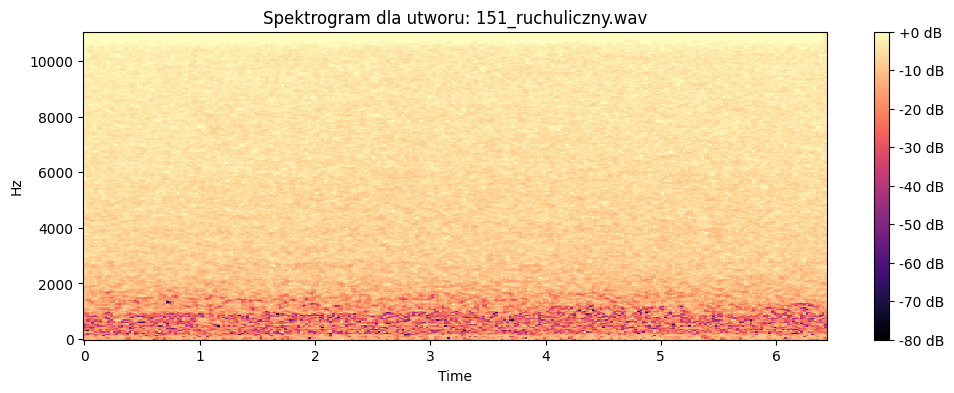

In [20]:
# Przykładowa wizualizacja spektrogramu

plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram_list[12], ref=np.max), sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektrogram dla utworu: '+ df_labels['name'][12])
plt.show()

# Odtwarzanie dźwięku
ipd.display(ipd.Audio(trunc_audio[12], rate=fs))

In [21]:
from sklearn import preprocessing

X_min = np.min(spectrogram_list)
X_max = np.max(spectrogram_list)
print(X_min)
print(X_max)
X_spec = []

for x in spectrogram_list:
    x_norm = (x - X_min) / (X_max - X_min)
    X_spec.append(x_norm)

#scaler = preprocessing.MinMaxScaler()
#X_spec = scaler.fit_transform(spectrogram_list[1])

X_spec = np.asarray(X_spec)
print(X_spec.shape)
print(X_spec)

-71.37638
41.707626
(500, 257, 278)
[[[0.12012328 0.12012328 0.12012328 ... 0.76640993 0.6796458  0.5312634 ]
  [0.12012328 0.12012328 0.12012328 ... 0.7275494  0.6971728  0.6144684 ]
  [0.12012328 0.12012328 0.12012328 ... 0.62501013 0.7051288  0.6856523 ]
  ...
  [0.12012328 0.12012328 0.12012328 ... 0.12012328 0.20730968 0.30860797]
  [0.12012328 0.12012328 0.12012328 ... 0.12012328 0.20723276 0.3085747 ]
  [0.12012328 0.12012328 0.12012328 ... 0.12012328 0.20726566 0.30859146]]

 [[0.15828314 0.15828314 0.15828314 ... 0.8211072  0.75700593 0.7020722 ]
  [0.15828314 0.15828314 0.15828314 ... 0.7959056  0.7890001  0.7331413 ]
  [0.15828314 0.15828314 0.15828314 ... 0.7352626  0.75358444 0.72091097]
  ...
  [0.15828314 0.15828314 0.15828314 ... 0.15828314 0.19440693 0.29457432]
  [0.15828314 0.15828314 0.15828314 ... 0.15828314 0.19477354 0.2950412 ]
  [0.15828314 0.15828314 0.15828314 ... 0.15828314 0.19469275 0.29535666]]

 [[0.60896945 0.73453873 0.7640402  ... 0.82500935 0.8593792

In [22]:
y_spec = df_labels['label']

print(y_spec[13])
print(np.shape(X_spec))

0.0
(500, 257, 278)


In [23]:
# Podział danych na treningowe i testowe
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X_spec, y_spec, test_size=0.2, random_state=42)


nsamples, nx, ny = X_spec_train.shape
nsamples1, nx1, ny1 = X_spec_test.shape
print(nsamples)
print(nx)
print(ny)


new_X_train = X_spec_train.reshape((nsamples,nx*ny))
new_X_test = X_spec_test.reshape((nsamples1,nx1*ny1))

scaler = StandardScaler()
X_spec_train = scaler.fit_transform(new_X_train)
X_spec_test = scaler.transform(new_X_test)

print(np.shape(X_spec_train))
print(np.shape(X_spec_test))
print(np.shape(y_spec_train))
print(np.shape(y_spec_test))
print(y_spec_test)


print(X_spec_test)


400
257
278
(400, 71446)
(100, 71446)
(400,)
(100,)
361    1.0
73     1.0
374    0.0
155    1.0
104    1.0
      ... 
347    0.0
86     1.0
75     1.0
438    0.0
15     1.0
Name: label, Length: 100, dtype: float64
[[-2.5687087   0.3008193   0.5063681  ... -0.5515297   0.5690931
   0.65597975]
 [ 0.39117748  0.7354135   0.7623846  ...  1.0112774   0.75661445
   0.7996416 ]
 [-0.84236485 -1.0788631  -2.0855057  ... -1.6103168  -2.0793383
  -2.6886442 ]
 ...
 [ 0.5656116   0.7758567   0.03542785 ...  0.11378047 -0.7838237
  -1.1332835 ]
 [-0.59612817 -1.0606087  -0.5535317  ... -1.5140558   0.41676342
   0.5310093 ]
 [-0.41644996  0.7171602   0.87995464 ... -0.37593395  0.686169
   0.74465483]]


In [24]:
print(X_spec_train.shape)

(400, 71446)


In [25]:
# Budowanie modelu CNN dla= spektrogramów
model = Sequential()

# OPCJA 1
# model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X_spec_train.shape[1], X_spec_train.shape[2],1 )))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# OPCJA 2
model.add(Conv1D(16, kernel_size=2,strides = 2, activation='relu', padding='same', input_shape=(X_spec_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(Conv1D(32, kernel_size=2, strides = 2, activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, kernel_size=2, strides = 2, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

# OPCJA 3
# model.add(Dense(64, activation='relu',input_shape=(X_spec_train.shape[1],1)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

#model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
len(model.weights)

#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 35723, 16)         48        
                                                                 
 dropout (Dropout)           (None, 35723, 16)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17861, 32)         1056      
                                                                 
 dropout_1 (Dropout)         (None, 17861, 32)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, 8930, 128)         8320      
                                                                 
 flatten (Flatten)           (None, 1143040)           0         
                                                                 
 dense (Dense)               (None, 128)               1

12

In [26]:
# import datetime
# log_dir = "'/content/drive/My Drive/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [27]:
# Trening z dłuższą liczbą epok
history = model.fit(X_spec_train, y_spec_train, validation_data=(X_spec_test, y_spec_test), epochs=10, batch_size=64)

Epoch 1/10
7/7 [==============================] - 9s 335ms/step - loss: 14.5421 - binary_accuracy: 0.5375 - val_loss: 4.0048 - val_binary_accuracy: 0.6300
Epoch 2/10
7/7 [==============================] - 2s 276ms/step - loss: 5.1561 - binary_accuracy: 0.6050 - val_loss: 2.0705 - val_binary_accuracy: 0.7100
Epoch 3/10
7/7 [==============================] - 2s 264ms/step - loss: 1.4567 - binary_accuracy: 0.7300 - val_loss: 0.8475 - val_binary_accuracy: 0.7300
Epoch 4/10
7/7 [==============================] - 2s 275ms/step - loss: 0.8198 - binary_accuracy: 0.7650 - val_loss: 0.5139 - val_binary_accuracy: 0.8400
Epoch 5/10
7/7 [==============================] - 2s 270ms/step - loss: 0.4952 - binary_accuracy: 0.8175 - val_loss: 0.7418 - val_binary_accuracy: 0.7200
Epoch 6/10
7/7 [==============================] - 2s 267ms/step - loss: 0.4486 - binary_accuracy: 0.8450 - val_loss: 0.4734 - val_binary_accuracy: 0.8200
Epoch 7/10
7/7 [==============================] - 2s 265ms/step - loss: 0.2

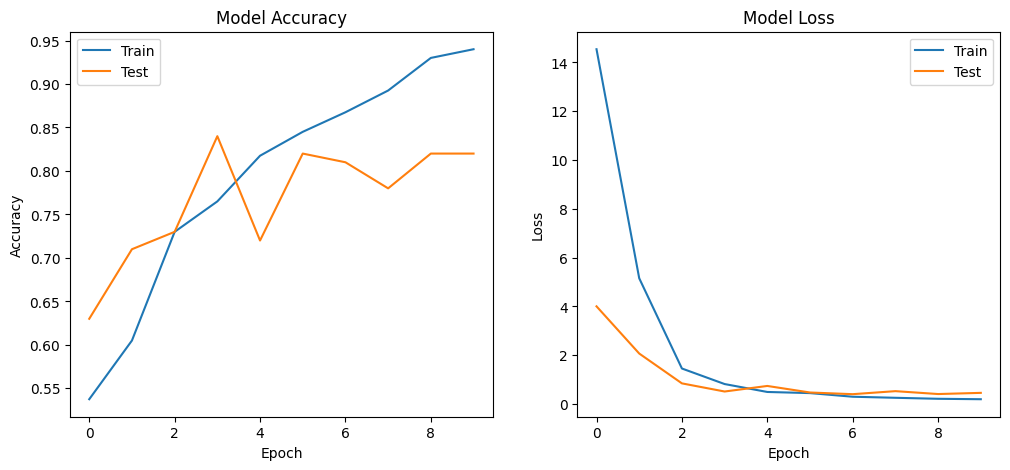

In [28]:
# Wizualizacja wyników
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'], label='Train')
plt.plot(history.history['val_binary_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

4/4 [==============================] - 0s 27ms/step
[[7.53984928e-01]
 [5.03590643e-01]
 [1.23415112e-01]
 [9.78559792e-01]
 [9.10923481e-01]
 [9.92061019e-01]
 [9.89203513e-01]
 [9.41515028e-01]
 [2.18565278e-02]
 [4.99343202e-02]
 [6.73447847e-01]
 [9.07858431e-01]
 [9.16787446e-01]
 [8.34190190e-01]
 [5.20263255e-01]
 [9.75942433e-01]
 [9.26051810e-02]
 [2.60340393e-01]
 [6.62158012e-01]
 [9.34504330e-01]
 [7.07158506e-01]
 [1.61476899e-02]
 [3.25420856e-01]
 [2.18823791e-01]
 [8.75026584e-01]
 [5.18661141e-01]
 [1.61116004e-01]
 [1.37424301e-02]
 [9.90903914e-01]
 [2.56730500e-03]
 [3.20674300e-01]
 [4.05105436e-03]
 [7.24056363e-02]
 [9.42446530e-01]
 [2.45021299e-01]
 [7.28745461e-01]
 [9.10688818e-01]
 [3.11357230e-01]
 [1.75264657e-01]
 [5.73703181e-03]
 [7.74162352e-01]
 [9.89030063e-01]
 [9.73617673e-01]
 [1.46650419e-01]
 [7.84606874e-01]
 [6.13438904e-01]
 [5.28377257e-02]
 [2.58190989e-01]
 [9.98619914e-01]
 [1.76692247e-01]
 [1.70992970e-01]
 [9.95349109e-01]
 [9.19476926

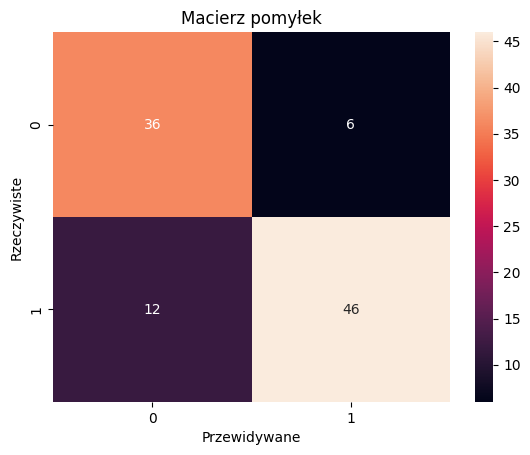

In [29]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer
# Raport klasyfikacji


y_pred = model.predict(X_spec_test)
print(y_pred)
#predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes = [1 if prediction > 0.5 else 0 for prediction in y_pred]
print(predicted_classes)
print(y_spec_test)
print(classification_report(y_spec_test, predicted_classes))

# Macierz pomyłek
cm = confusion_matrix(y_spec_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Macierz pomyłek')
plt.ylabel('Rzeczywiste')
plt.xlabel('Przewidywane')
plt.show()

# print('test accuracy = ', accuracy_score(y_spec_test, y_pred))
# print('test F1 = ', f1_score(y_spec_test, y_pred, average='macro'))
# print(confusion_matrix(y_spec_test, y_pred))
#metrics.f1_score(y_spec_test, predicted_classes, average='weighted', labels=np.unique(predicted_classes))

In [ ]:
# Walidacja krzyżowa

from sklearn.model_selection import KFold

num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_spec_train, X_spec_test), axis=0)
targets = np.concatenate((y_spec_train, y_spec_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  set_seeds()

  spec_model = Sequential()
  spec_model.add(Conv1D(16, kernel_size=2,strides = 2, activation='relu', padding='same', input_shape=(X_spec_train.shape[1],1)))
  spec_model.add(Dropout(0.25))
  spec_model.add(Conv1D(32, kernel_size=2, strides = 2, activation='relu'))
  spec_model.add(Dropout(0.2))
  spec_model.add(Conv1D(128, kernel_size=2, strides = 2, activation='relu'))
  spec_model.add(Flatten())
  spec_model.add(Dense(128, activation='relu'))
  spec_model.add(Dense(64, activation='relu'))
  spec_model.add(Dense(1, activation='sigmoid'))

  # Compiling the ANN
  spec_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])



  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history =  spec_model.fit(inputs[train], targets[train],
              batch_size=64,
              epochs=15,
              verbose=0)

  # Generate generalization metrics
  scores = spec_model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {spec_model.metrics_names[0]} of {scores[0]}; {spec_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.35754328966140747; binary_accuracy of 83.99999737739563%
------------------------------------------------------------------------
Training for fold 2 ...


KeyboardInterrupt: 

In [30]:
#MFCCs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [31]:
#Funkcja do tworzenia mel sektrogramu
def create_mel_spectrogram(data, fs, n_fft, hop_length, n_mels, fmax):
    S = librosa.feature.melspectrogram(y=data, sr=fs, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmax = fmax)
    S_DB = librosa.power_to_db(S, ref=np.max)
    return S_DB

In [32]:
#print((min_dlugosc/fs))

In [33]:
trunc_audio_mfcc = []
mfccs = []
mfccs_coeffs = []
delta_mfcc = []
delta2_mfcc = []

audio_data_mfcc = []
sig_len_mfcc = []

for i in audio_files:
  data, fs = librosa.load(i, sr = 48000)
  audio_data_mfcc.append(data)
  sig_len_mfcc.append(len(data))

srednia_dlugosc_mfcc = np.mean(sig_len_mfcc)
max_dlugosc_mfcc = np.max(sig_len_mfcc)
min_dlugosc_mfcc = np.min(sig_len_mfcc)

print(min_dlugosc_mfcc)
print(round(srednia_dlugosc_mfcc/fs,2))
print(round(max_dlugosc_mfcc/fs,2))
print(round(min_dlugosc_mfcc/fs,2))

for counts, item in enumerate(audio_data_mfcc):

    # if sig_len_mfcc[counts] > srednia_dlugosc_mfcc:
    #   item_mfcc = item[:round(srednia_dlugosc_mfcc)]
    # else:
    #   zero_padding_mfcc = np.zeros(round(srednia_dlugosc_mfcc)-sig_len_mfcc[counts])
    #   item_mfcc = np.concatenate([item,zero_padding_mfcc], axis=0)

    item_mfcc = item[:min_dlugosc_mfcc]
    trunc_audio_mfcc.append(item_mfcc)

    #mfcc = librosa.feature.melspectrogram(y=trunc_audio_mfcc[counts], sr=fs, n_fft=512, hop_length=128, n_mels=20, fmax = 8000)
    #S_dB = librosa.power_to_db(mfcc, ref=np.max)
    my_mfcc = create_mel_spectrogram(trunc_audio_mfcc[counts], fs, n_fft=512, hop_length=128, n_mels=20, fmax=8000)
    mfcc_20_coeffs = librosa.feature.mfcc(y=trunc_audio_mfcc[counts], sr=fs, n_fft=512, hop_length=128, n_mfcc=20)
    delta_1 =  librosa.feature.delta(mfcc_20_coeffs)
    delta_2 =  librosa.feature.delta(mfcc_20_coeffs, order = 2)

    mfccs_coeffs.append(mfcc_20_coeffs)
    mfccs.append(my_mfcc)
    delta_mfcc.append(delta_1)
    delta2_mfcc.append(delta_2)

mfccs = np.asarray(mfccs)
delta_mfcc = np.asarray(delta_mfcc)
delta2_mfcc = np.asarray(delta2_mfcc)

77275
4.63
9.56
1.61


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [34]:
print(np.shape(mfccs))
print(mfccs[1])

(500, 20, 604)
[[-80.       -80.       -80.       ...  -8.203691 -10.934614 -10.253302]
 [-80.       -80.       -80.       ... -18.900549 -20.530083 -20.153212]
 [-80.       -80.       -80.       ... -28.48436  -30.88764  -25.44664 ]
 ...
 [-80.       -80.       -80.       ... -37.35825  -38.219917 -39.30364 ]
 [-80.       -80.       -80.       ... -38.05619  -39.117134 -41.23294 ]
 [-80.       -80.       -80.       ... -40.61546  -40.8627   -41.29725 ]]


In [35]:
print(np.shape(mfccs_coeffs))
print(mfccs_coeffs[1])

(500, 20, 604)
[[-8.0834546e+02 -8.0834546e+02 -8.0834546e+02 ... -4.5664932e+02
  -4.6998450e+02 -4.5146576e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.2005981e+01
   7.2195175e+01  5.2752853e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.6794800e+01
  -8.4542763e+01 -6.3327469e+01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.2092423e+00
  -5.5602450e+00 -7.6691356e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.0459538e+00
  -2.6831613e+00 -6.7877507e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.6420784e+00
   5.2297938e-01 -3.7364457e+00]]


In [36]:
print(np.shape(delta_mfcc))
print(delta_mfcc[1])

(500, 20, 604)
[[ 0.00754801  0.00754801  0.00754801 ...  0.7196172   0.7196172
   0.7196172 ]
 [-0.0106642  -0.0106642  -0.0106642  ... -1.3548716  -1.3548716
  -1.3548716 ]
 [ 0.01064718  0.01064718  0.01064718 ... -1.391087   -1.391087
  -1.391087  ]
 ...
 [-0.00904643 -0.00904643 -0.00904643 ... -0.3312692  -0.3312692
  -0.3312692 ]
 [ 0.00885185  0.00885185  0.00885185 ...  0.34649202  0.34649202
   0.34649202]
 [-0.00864672 -0.00864672 -0.00864672 ...  0.56107384  0.56107384
   0.56107384]]


In [37]:
print(np.shape(delta2_mfcc))
print(delta2_mfcc[1])

(500, 20, 604)
[[ 0.00566755  0.00566755  0.00566755 ...  1.2004085   1.2004085
   1.2004085 ]
 [-0.00800974 -0.00800974 -0.00800974 ... -1.7075617  -1.7075617
  -1.7075617 ]
 [ 0.00800374  0.00800374  0.00800374 ...  1.9710671   1.9710671
   1.9710671 ]
 ...
 [-0.00737397 -0.00737397 -0.00737397 ... -0.1738388  -0.1738388
  -0.1738388 ]
 [ 0.00728809  0.00728809  0.00728809 ...  1.129704    1.129704
   1.129704  ]
 [-0.00719553 -0.00719553 -0.00719553 ...  0.5944366   0.5944366
   0.5944366 ]]


In [38]:
mfcc_data = []
mfcc_data = np.concatenate((mfccs, mfccs_coeffs, delta_mfcc, delta2_mfcc), axis=2)
print(mfcc_data)
print(np.shape(mfcc_data))

[[[-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ... -1.26948011e+00
   -1.26948011e+00 -1.26948011e+00]
  [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ...  1.43858600e+00
    1.43858600e+00  1.43858600e+00]
  [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ...  5.63599408e-01
    5.63599408e-01  5.63599408e-01]
  ...
  [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ... -2.06382439e-01
   -2.06382439e-01 -2.06382439e-01]
  [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ... -5.76505482e-01
   -5.76505482e-01 -5.76505482e-01]
  [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ...  5.76090157e-01
    5.76090157e-01  5.76090157e-01]]

 [[-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ...  1.20040846e+00
    1.20040846e+00  1.20040846e+00]
  [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ... -1.70756173e+00
   -1.70756173e+00 -1.70756173e+00]
  [-8.00000000e+01 -8.00000000e+01 -8.00000000e+01 ...  1.97106707e+00
    1.97106707e+00  1.97106707e+00]
  ...
  [-8.00000000e+01 -8.0

1.6098958333333333


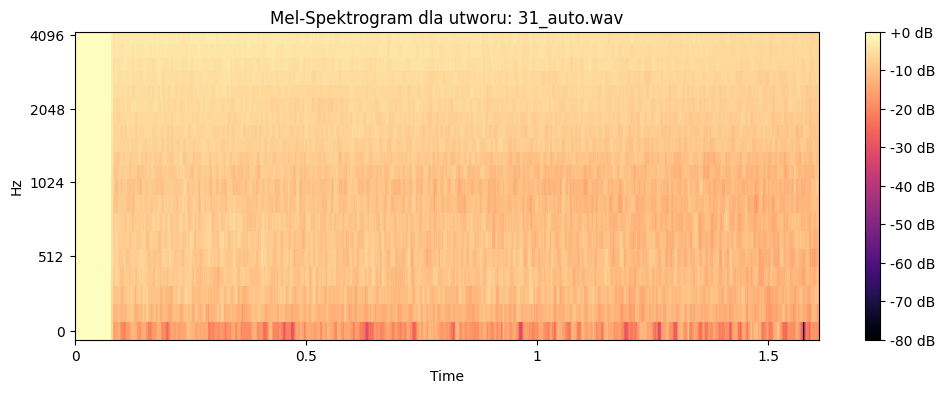

48000


In [39]:
# Przykładowa wizualizacja melspektrogramu
t = (len(trunc_audio_mfcc[0])/fs)
print(t)
plt.figure(figsize=(12, 4))
librosa.display.specshow(data= librosa.amplitude_to_db(mfccs[0], ref=np.max), sr=fs, hop_length=128, x_axis='time', y_axis='mel',fmax=4000)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel-Spektrogram dla utworu: '+ df_labels['name'][0])
plt.show()

# Odtwarzanie dźwięku
ipd.display(ipd.Audio(trunc_audio_mfcc[0], rate=fs))
print(fs)

In [40]:
X_melspec = []
y_melspec = df_labels['label']

print(X_melspec)
print(y_melspec)
# Normalizacja danych

X_melspec_min = np.min(mfcc_data)
X_melspec_max = np.max(mfcc_data)
print(X_melspec_min)
print(X_melspec_max)
print(len(mfcc_data))

for y in mfcc_data:
    X_melspec_norm = (y - X_melspec_min) / (X_melspec_max - X_melspec_min)
    X_melspec.append(X_melspec_norm)



#scaler = preprocessing.MinMaxScaler()
#X_spec = scaler.fit_transform(spectrogram_list[1])

X_melspec = np.asarray(X_melspec)
print(X_melspec.shape)
print(X_melspec)

[]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: label, Length: 500, dtype: float64
-842.83606
174.05121
500
(500, 20, 2416)
[[[0.7501678  0.7501678  0.7501678  ... 0.8275908  0.8275908  0.8275908 ]
  [0.7501678  0.7501678  0.7501678  ... 0.83025396 0.83025396 0.83025396]
  [0.7501678  0.7501678  0.7501678  ... 0.82939345 0.82939345 0.82939345]
  ...
  [0.7501678  0.7501678  0.7501678  ... 0.8286363  0.8286363  0.8286363 ]
  [0.7501678  0.7501678  0.7501678  ... 0.82827234 0.82827234 0.82827234]
  [0.7501678  0.7501678  0.7501678  ... 0.8294058  0.8294058  0.8294058 ]]

 [[0.7501678  0.7501678  0.7501678  ... 0.83001965 0.83001965 0.83001965]
  [0.7501678  0.7501678  0.7501678  ... 0.82716    0.82716    0.82716   ]
  [0.7501678  0.7501678  0.7501678  ... 0.8307776  0.8307776  0.8307776 ]
  ...
  [0.7501678  0.7501678  0.7501678  ... 0.8286683  0.8286683  0.8286683 ]
  [0.7501678  0.7501678  0.7501678  ... 

In [41]:
X_melspec_train, X_melspec_test, y_melspec_train, y_melspec_test = train_test_split(X_melspec, y_melspec, test_size=0.2, random_state=42)


nsamples_mel, nx_mel, ny_mel = X_melspec_train.shape
nsamples1_mel, nx1_mel, ny1_mel = X_melspec_test.shape
print(nsamples_mel)
print(nx_mel)
print(ny_mel)
print(nsamples1_mel)
print(nx1_mel)
print(ny1_mel)

# new_X_train_mel = X_melspec_train.reshape((nsamples_mel,nx_mel*ny_mel))
# new_X_test_mel = X_melspec_test.reshape((nsamples1_mel,nx1_mel*ny1_mel))

# scaler = StandardScaler()
# X_melspec_train = scaler.fit_transform(new_X_train_mel)
# X_melspec_test = scaler.transform(new_X_test_mel)

scalers = {}
for i in range(X_melspec_train.shape[1]):
    scalers[i] = StandardScaler()
    X_melspec_train[:, i, :] = scalers[i].fit_transform(X_melspec_train[:, i, :])

for i in range(X_melspec_test.shape[1]):
    X_melspec_test[:, i, :] = scalers[i].transform(X_melspec_test[:, i, :])


print(np.shape(X_melspec_train))
print(np.shape(X_melspec_test))
print(np.shape(y_melspec_train))
print(np.shape(y_melspec_test))

print(y_melspec_test)
print(X_melspec_test)


400
20
2416
100
20
2416
(400, 20, 2416)
(100, 20, 2416)
(400,)
(100,)
361    1.0
73     1.0
374    0.0
155    1.0
104    1.0
      ... 
347    0.0
86     1.0
75     1.0
438    0.0
15     1.0
Name: label, Length: 100, dtype: float64
[[[-2.7362897e+00 -1.1439964e+00  4.3390065e-01 ...  5.7014763e-01
    5.7014763e-01  5.7014763e-01]
  [-1.6071920e+00 -3.0944899e-01  9.6758878e-01 ... -9.2863554e-01
   -9.2863554e-01 -9.2863554e-01]
  [-1.1787912e+00 -1.2316347e+00 -3.8191673e-01 ...  2.0496786e+00
    2.0496786e+00  2.0496786e+00]
  ...
  [-2.5322318e+00 -1.5299592e+00 -4.5156363e-01 ...  3.9829060e-01
    3.9829060e-01  3.9829060e-01]
  [-2.2974591e+00 -1.6376548e+00 -7.3961675e-01 ... -7.1822929e-01
   -7.1822929e-01 -7.1822929e-01]
  [-2.2248242e+00 -1.2198637e+00 -4.9719128e-01 ...  2.6858342e-01
    2.6858342e-01  2.6858342e-01]]

 [[-1.5199342e+00 -6.0250199e-01  2.3877656e-01 ...  2.5924408e-01
    2.5924408e-01  2.5924408e-01]
  [-1.8946824e+00 -1.1390141e+00 -1.2976141e+00 ... -

In [42]:
X_melspec_train.shape

(400, 20, 2416)

In [48]:
# Budowanie modelu CNN dla= spektrogramów
model_mel = Sequential()

# OPCJA 1
# model_mel.add(Conv1D(16, kernel_size=2, strides = 2, activation='relu', padding='same', input_shape=(X_melspec_train.shape[1], 1 )))
# model_mel.add(Dropout(0.25))
# model_mel.add(Conv1D(32, kernel_size=3, strides = 2,  padding='same', activation='relu',))
# model_mel.add(Dropout(0.2))
# model_mel.add(Conv1D(64, kernel_size=5, strides = 2, padding='same', activation='relu'))
# #model_mel.add(MaxPooling2D())
# model_mel.add(Dropout(0.2))
# model_mel.add(Conv1D(128, kernel_size=5, strides = 2, padding='same', activation='relu'))
# model_mel.add(Flatten())

# model_mel.add(Dense(128, activation='relu'))
# model_mel.add(Dropout(0.2))
# model_mel.add(Dense(64, activation='relu'))
# model_mel.add(Dense(1, activation='sigmoid'))
# adam = tf.optimizers.Adam(learning_rate=0.001)
# model_mel.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

# OPCJA 2
model_mel.add(Conv2D(16, kernel_size=(2,2) ,strides = 2, activation='relu', padding='same', input_shape=(X_melspec_train.shape[1],X_melspec_train.shape[2], 1)))
model_mel.add(Dropout(0.4))
model_mel.add(Conv2D(32, kernel_size=(3,3), strides = 2, activation='relu',padding='same'))
model_mel.add(Dropout(0.2))
model_mel.add(Conv2D(64, kernel_size=(3,3), strides = 2, activation='relu',padding='same'))
model_mel.add(Dropout(0.3))
model_mel.add(Conv2D(128, kernel_size=(5,5), strides = 2, activation='relu',padding='same'))
model_mel.add(MaxPooling2D(pool_size=(2,2)))
model_mel.add(Flatten())

model_mel.add(Dense(256, activation='relu'))
model_mel.add(Dropout(0.4))
model_mel.add(Dense(64, activation='relu'))

#model_mel.add(BatchNormalization())
model_mel.add(Dense(1, activation='sigmoid'))
adam = tf.optimizers.Adam(learning_rate=0.001)
model_mel.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

# OPCJA 3
# model_mel.add(Dense(64, activation='relu',input_shape=(X_spec_train.shape[1],1)))
# model_mel.add(Dense(32, activation='relu'))
# model_mel.add(Dense(64, activation='relu'))
# model_mel.add(Dense(16, activation='relu'))
# model_mel.add(Dense(1, activation='sigmoid'))
# adam = tf.keras.optimizers.Adam(learning_rate=0.001)
# model_mel.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

#model_mel.compile(loss='binary_crossentropy', metrics=['accuracy'])
model_mel.summary()
len(model_mel.weights)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 10, 1208, 16)      80        
                                                                 
 dropout_6 (Dropout)         (None, 10, 1208, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 604, 32)        4640      
                                                                 
 dropout_7 (Dropout)         (None, 5, 604, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 302, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 3, 302, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 151, 128)      

14

In [49]:
checkpoint_filepath = '/content/drive/My Drive/MFCCS_best_model.h5'
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, start_from_epoch= 5, verbose = 1)
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_binary_accuracy', mode='max', verbose=1, save_best_only=True)

In [50]:
# Trenowanie modelu na mel spektrogramach
history_mel = model_mel.fit(X_melspec_train, y_melspec_train, validation_data=(X_melspec_test, y_melspec_test), epochs=20, batch_size=64, callbacks=[callback])

Epoch 1/20
7/7 [==============================] - 6s 286ms/step - loss: 0.6949 - binary_accuracy: 0.5875 - val_loss: 0.6234 - val_binary_accuracy: 0.7000
Epoch 2/20
7/7 [==============================] - 0s 70ms/step - loss: 0.5636 - binary_accuracy: 0.6950 - val_loss: 0.5273 - val_binary_accuracy: 0.7400
Epoch 3/20
7/7 [==============================] - 0s 73ms/step - loss: 0.5774 - binary_accuracy: 0.7300 - val_loss: 0.5413 - val_binary_accuracy: 0.7400
Epoch 4/20
7/7 [==============================] - 0s 68ms/step - loss: 0.5299 - binary_accuracy: 0.7525 - val_loss: 0.5178 - val_binary_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 0s 67ms/step - loss: 0.5081 - binary_accuracy: 0.7500 - val_loss: 0.4939 - val_binary_accuracy: 0.7600
Epoch 6/20
7/7 [==============================] - 0s 70ms/step - loss: 0.4745 - binary_accuracy: 0.7775 - val_loss: 0.4520 - val_binary_accuracy: 0.7700
Epoch 7/20
7/7 [==============================] - 0s 63ms/step - loss: 0.4401 - b

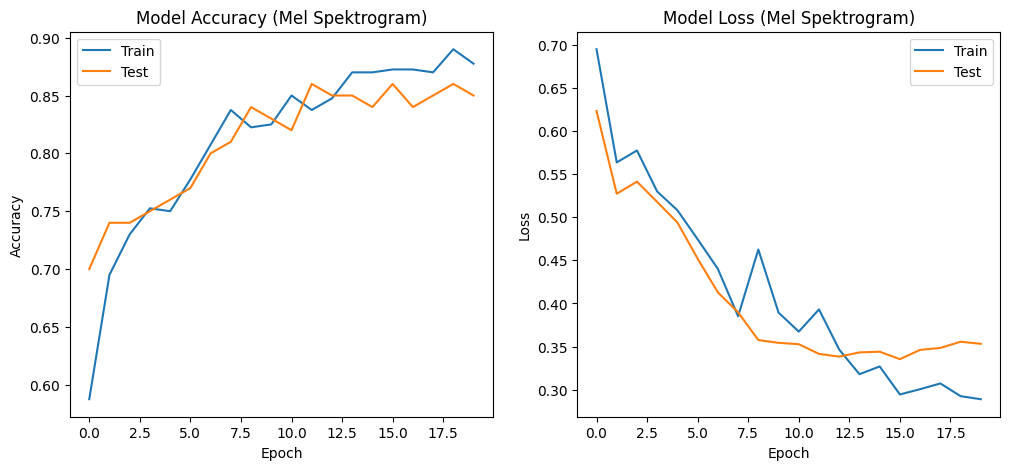

In [51]:
# Wizualizacja wyników
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mel.history['binary_accuracy'], label='Train')
plt.plot(history_mel.history['val_binary_accuracy'], label='Test')
plt.title('Model Accuracy (Mel Spektrogram)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mel.history['loss'], label='Train')
plt.plot(history_mel.history['val_loss'], label='Test')
plt.title('Model Loss (Mel Spektrogram)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

4/4 [==============================] - 0s 13ms/step
Przewidywana wartość próbki: [0.79390556], Przewidywana klasa próbki:  1 --> ruch uliczny
Rzeczywista wartosc probki: 1, Rzeczywista klasa probki: ruch uliczny, Nazwa probki: 239_ruchuliczny.wav
----------------------------------------------------------------------------------------------------------
Przewidywana wartość próbki: [0.6296545], Przewidywana klasa próbki:  1 --> ruch uliczny
Rzeczywista wartosc probki: 1, Rzeczywista klasa probki: ruch uliczny, Nazwa probki: 155_ruchuliczny.wav
----------------------------------------------------------------------------------------------------------
Przewidywana wartość próbki: [0.78209394], Przewidywana klasa próbki:  1 --> ruch uliczny
Rzeczywista wartosc probki: 0, Rzeczywista klasa probki: auto, Nazwa probki: 126_auto.wav
----------------------------------------------------------------------------------------------------------
Przewidywana wartość próbki: [0.9775533], Przewidywana kla

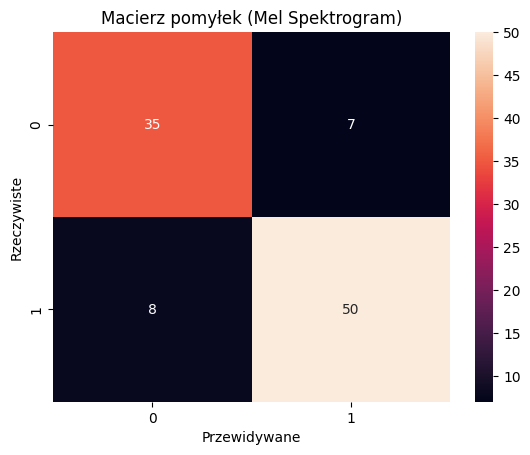

In [125]:
# Raport klasyfikacji dla mel spektrogramów

y_pred_mel = model_mel.predict(X_melspec_test)
#predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes_mel = [1 if prediction > 0.5 else 0 for prediction in y_pred_mel]
predicted_class_name_mel = ['ruch uliczny' if prediction == 1 else 'auto' for prediction in predicted_classes_mel]

real_class_name_mel = ['ruch uliczny' if real == 1 else 'auto' for real in y_melspec_test.values]
mispredicted_samples = []

for counts, value in enumerate(y_melspec_test):
  #print(f"Wartość: {value}, kolejność: {counts}")
  print(f"Przewidywana wartość próbki: {y_pred_mel[counts]}, Przewidywana klasa próbki:  {predicted_classes_mel[counts]} --> {predicted_class_name_mel[counts]}")
  print(f"Rzeczywista wartosc probki: {int(value)}, Rzeczywista klasa probki: {real_class_name_mel[counts]}, Nazwa probki: {df_labels['name'][y_melspec_test.index[counts]]}")
  if predicted_classes_mel[counts] != int(value):
    text = (f"Rzeczywista wartosc probki: {int(value)} --> Rzeczywista klasa probki: {real_class_name_mel[counts]}, Przewidywana wartosc probki:  {predicted_classes_mel[counts]} --> Przewidywana klasa probki: {predicted_class_name_mel[counts]}")
    mispredicted_samples.append([df_labels['name'][y_melspec_test.index[counts]], real_class_name_mel[counts], predicted_class_name_mel[counts],text])
  print("----------------------------------------------------------------------------------------------------------")


print(classification_report(y_melspec_test, predicted_classes_mel))

# Macierz pomyłek dla mel spektrogramów
cm_mel = confusion_matrix(y_melspec_test, predicted_classes_mel)
sns.heatmap(cm_mel, annot=True, fmt='d')
plt.title('Macierz pomyłek (Mel Spektrogram)')
plt.ylabel('Rzeczywiste')
plt.xlabel('Przewidywane')
plt.show()

In [126]:
print(mispredicted_samples)

[['126_auto.wav', 'auto', 'ruch uliczny', 'Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny'], ['137_ruchuliczny.wav', 'ruch uliczny', 'auto', 'Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto'], ['190_ruchuliczny.wav', 'ruch uliczny', 'auto', 'Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto'], ['125_auto.wav', 'auto', 'ruch uliczny', 'Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny'], ['108_auto.wav', 'auto', 'ruch uliczny', 'Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny'], ['150_ruchuliczny.wav', 'ruch uliczny', 'auto', 'R

In [127]:
#Odsłuch i opis błędnie sklasyfikowanych próbek dźwiekowych
print("Lista błędnie sklasyfikowanych próbek..")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for x in mispredicted_samples:
  sample_path = (f"{folder_path}/{x[0]}")
  print(f"Plik audio: {x[0]}, Lokalizacja pliku: {sample_path}")
  print(f"{x[3]}")

  # Odtwarzanie dźwięku
  print(f'Odtwarzanie błędnie sklasyfikowanego pliku:',x[0])
  signal,fs = librosa.load(sample_path)
  ipd.display(ipd.Audio(signal, rate=fs))
  #print(fs)

Lista błędnie sklasyfikowanych próbek..
----------------------------------------------------------------------------------------------------------------------------------------------
Plik audio: 126_auto.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/126_auto.wav
Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny
Odtwarzanie błędnie sklasyfikowanego pliku: 126_auto.wav


Plik audio: 137_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/137_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 137_ruchuliczny.wav


Plik audio: 190_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/190_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 190_ruchuliczny.wav


Plik audio: 125_auto.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/125_auto.wav
Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny
Odtwarzanie błędnie sklasyfikowanego pliku: 125_auto.wav


Plik audio: 108_auto.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/108_auto.wav
Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny
Odtwarzanie błędnie sklasyfikowanego pliku: 108_auto.wav


Plik audio: 150_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/150_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 150_ruchuliczny.wav


Plik audio: 153_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/153_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 153_ruchuliczny.wav


Plik audio: 63_auto.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/63_auto.wav
Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny
Odtwarzanie błędnie sklasyfikowanego pliku: 63_auto.wav


Plik audio: 160_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/160_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 160_ruchuliczny.wav


Plik audio: 8_auto.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/8_auto.wav
Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny
Odtwarzanie błędnie sklasyfikowanego pliku: 8_auto.wav


Plik audio: 128_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/128_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 128_ruchuliczny.wav


Plik audio: 64_auto.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/64_auto.wav
Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny
Odtwarzanie błędnie sklasyfikowanego pliku: 64_auto.wav


Plik audio: 175_auto.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/175_auto.wav
Rzeczywista wartosc probki: 0 --> Rzeczywista klasa probki: auto, Przewidywana wartosc probki:  1 --> Przewidywana klasa probki: ruch uliczny
Odtwarzanie błędnie sklasyfikowanego pliku: 175_auto.wav


Plik audio: 157_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/157_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 157_ruchuliczny.wav


Plik audio: 15_ruchuliczny.wav, Lokalizacja pliku: /content/drive/My Drive/Projekt praca magisterska/15_ruchuliczny.wav
Rzeczywista wartosc probki: 1 --> Rzeczywista klasa probki: ruch uliczny, Przewidywana wartosc probki:  0 --> Przewidywana klasa probki: auto
Odtwarzanie błędnie sklasyfikowanego pliku: 15_ruchuliczny.wav


In [128]:
misprediction_df = pd.DataFrame(mispredicted_samples, columns = ["Plik", "Rzeczywista klasa", "Przewidywana klasa", "Opis"])
misprediction_df

Plik Rzeczywista klasa Przewidywana klasa  \
0          126_auto.wav              auto       ruch uliczny   
1   137_ruchuliczny.wav      ruch uliczny               auto   
2   190_ruchuliczny.wav      ruch uliczny               auto   
3          125_auto.wav              auto       ruch uliczny   
4          108_auto.wav              auto       ruch uliczny   
5   150_ruchuliczny.wav      ruch uliczny               auto   
6   153_ruchuliczny.wav      ruch uliczny               auto   
7           63_auto.wav              auto       ruch uliczny   
8   160_ruchuliczny.wav      ruch uliczny               auto   
9            8_auto.wav              auto       ruch uliczny   
10  128_ruchuliczny.wav      ruch uliczny               auto   
11          64_auto.wav              auto       ruch uliczny   
12         175_auto.wav              auto       ruch uliczny   
13  157_ruchuliczny.wav      ruch uliczny               auto   
14   15_ruchuliczny.wav      ruch uliczny               auto   

                                                 Opis  
0   Rzeczywista wartosc probki: 0 --> Rzeczywista ...  
1   Rzeczywista wartosc probki: 1 --> Rzeczywista ...  
2   Rzeczywista wartosc probki: 1 --> Rzeczywista ...  
3   Rzeczywista wartosc probki: 0 --> Rzeczywista ...  
4   Rzeczywista wartosc probki: 0 --> Rzeczywista ...  
5   Rzeczywista wartosc probki: 1 --> Rzeczywista ...  
6   Rzeczywista wartosc probki: 1 --> Rzeczywista ...  
7   Rzeczywista wartosc probki: 0 --> Rzeczywista ...  
8   Rzeczywista wartosc probki: 1 --> Rzeczywista ...  
9   Rzeczywista wartosc probki: 0 --> Rzeczywista ...  
10  Rzeczywista wartosc probki: 1 --> Rzeczywista ...  
11  Rzeczywista wartosc probki: 0 --> Rzeczywista ...  
12  Rzeczywista wartosc probki: 0 --> Rzeczywista ...  
13  Rzeczywista wartosc probki: 1 --> Rzeczywista ...  
14  Rzeczywista wartosc probki: 1 --> Rzeczywista ...

In [129]:
misprediction_df.to_csv('/content/drive/My Drive/Mispredicted samples.csv', sep=';', index=False, header=True)
misprediction_df.to_csv('/content/drive/My Drive/Mispredicted samples.txt', sep='\t', index=False, header=True)

In [130]:
best_model = tf.keras.models.load_model(checkpoint_filepath)

_, train_acc = best_model.evaluate(X_melspec_train, y_melspec_train, verbose=0)
_, test_acc = best_model.evaluate(X_melspec_test, y_melspec_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
loss, acc = best_model.evaluate(X_melspec_test, y_melspec_test, verbose=2)
print("Saved model, accuracy: {:5.2f}%".format(100 * acc))

Train: 0.920, Test: 0.900
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4/4 - 0s - loss: 0.2956 - binary_accuracy: 0.9000 - 84ms/epoch - 21ms/step
Saved model, accuracy: 90.00%


In [132]:
# Walidacja krzyżowa dla MFCCs

from sklearn.model_selection import KFold

num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs_mel = np.concatenate((X_melspec_train, X_melspec_test), axis=0)
targets_mel = np.concatenate((y_melspec_train, y_melspec_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs_mel, targets_mel):

  # Define the model architecture
  set_seeds()

  mel_spec_model = Sequential()
  mel_spec_model.add(Conv2D(16, kernel_size=(2,2) ,strides = 2, activation='relu', padding='same', input_shape=(X_melspec_train.shape[1],X_melspec_train.shape[2], 1)))
  mel_spec_model.add(Dropout(0.3))
  mel_spec_model.add(Conv2D(32, kernel_size=(3,3), strides = 2, activation='relu',padding='same'))
  mel_spec_model.add(Dropout(0.2))
  mel_spec_model.add(Conv2D(64, kernel_size=(3,3), strides = 2, activation='relu',padding='same'))
  mel_spec_model.add(Dropout(0.5))
  mel_spec_model.add(Conv2D(128, kernel_size=(5,5), strides = 2, activation='relu',padding='same'))
  #mel_spec_model.add(MaxPooling2D(2,2))
  mel_spec_model.add(Flatten())

  mel_spec_model.add(Dense(256, activation='relu'))
  mel_spec_model.add(Dropout(0.4))
  mel_spec_model.add(Dense(64, activation='relu'))
  #mel_spec_model.add(BatchNormalization())
  mel_spec_model.add(Dense(1, activation='sigmoid'))
  adam = tf.optimizers.Adam(learning_rate=0.001)
  mel_spec_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

  # Compiling the ANN
  mel_spec_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])



  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history =  mel_spec_model.fit(inputs_mel[train], targets_mel[train],
              batch_size=64,
              epochs=20,
              verbose=0)

  # Generate generalization metrics
  scores_mel = mel_spec_model.evaluate(inputs_mel[test], targets_mel[test], verbose=0)
  print(f'Score for fold {fold_no}: {mel_spec_model.metrics_names[0]} of {scores_mel[0]}; {mel_spec_model.metrics_names[1]} of {scores_mel[1]*100}%')
  acc_per_fold.append(scores_mel[1] * 100)
  loss_per_fold.append(scores_mel[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.39559638500213623; binary_accuracy of 77.99999713897705%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.413910835981369; binary_accuracy of 81.99999928474426%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.4345931112766266; binary_accuracy of 80.0000011920929%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.369385689496994; binary_accuracy of 92.00000166893005%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.4763774573802948; binary_accuracy of 81.99999928474426%
------------------------------------------------------------------------
Training for fold 6 ...


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
print(np.shape(trunc_audio_mfcc))
#print(trunc_audio_mfcc)
#Stworzenie tabeli z wszystkimi cechami sygnałów, które wyróżniam z piosenki

all_features = []

for x in trunc_audio_mfcc:
    mfcc_20_coeffs = librosa.feature.mfcc(y=x, sr=fs, n_fft=512, hop_length=128, n_mfcc=20, fmax = 8000)
    delta_1 =  librosa.feature.delta(mfcc_20_coeffs)
    delta_2 =  librosa.feature.delta(mfcc_20_coeffs, order = 2)
    chroma_stft = librosa.feature.chroma_stft(y=x, sr=fs)
    spactral_centroid = librosa.feature.spectral_centroid(y=x, sr=fs, n_fft=512, hop_length=128)
    spectral_contrast = librosa.feature.spectral_contrast(y=x, sr=fs,n_fft=512, hop_length=128)
    rms = librosa.feature.rms(y=x, frame_length=512, hop_length= 128)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=x,frame_length=512, hop_length= 128)
    #tempo = librosa.feature.tempo(y=x, sr=fs)

    features = {
        'mfccs': np.mean(mfcc_20_coeffs, axis=1),
        'delta_1': np.mean(delta_1, axis=1),
        'delta_2': np.mean(delta_2, axis=1),
        'chroma': np.mean(chroma_stft, axis=1),
        'spactral_centroid': np.mean(spactral_centroid, axis=1),
        'spectral_contrast': np.mean(spectral_contrast, axis=1),
        'rms': np.mean(rms),
        'zero_crossing_rate': np.mean(zero_crossing_rate),
        #'tempo': (tempo)
        }
    all_features.append(features)

(500, 77275)


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
#print(np.shape(all_features))

df = pd.DataFrame(all_features)
print(df.shape)
df

(500, 8)


mfccs  \
0    [-525.025, -26.34968, -49.643726, 28.676874, 8...   
1    [-514.65546, -28.895508, -41.599174, 21.465845...   
2    [-496.73334, -9.439539, -30.599628, 19.916712,...   
3    [-497.83417, -13.643866, -31.985685, 30.477594...   
4    [-414.1115, -7.03779, -25.993935, 25.0297, 6.5...   
..                                                 ...   
495  [-496.42944, -24.535023, -27.021828, 24.923687...   
496  [-550.1051, 16.112923, -34.2533, 30.166164, 8....   
497  [-509.69247, -12.286224, -30.182566, 29.89222,...   
498  [-532.7455, -4.837965, -43.99695, 27.43005, 5....   
499  [-402.84485, -43.942356, -42.942413, 28.022429...   

                                               delta_1  \
0    [0.5791598, -0.09433007, -0.07208769, 0.047559...   
1    [0.5586838, -0.09128226, -0.07129233, 0.050967...   
2    [0.06559181, -0.024180677, 0.0019073912, -0.01...   
3    [-0.0036452368, -0.006949374, 0.0034437345, -0...   
4    [-0.003176427, -0.003211571, -0.036248185, -0....   
..                                                 ...   
495  [0.00830951, -0.030340385, 0.039805602, -0.032...   
496  [0.09616817, -0.056240626, 0.009837906, -0.009...   
497  [0.023475217, 0.016994119, 0.0023457562, -0.01...   
498  [0.058503576, -0.021486782, 0.031790316, -0.00...   
499  [0.10985094, -0.082616575, 0.008837659, -0.023...   

                                               delta_2  \
0    [-0.013834429, 0.010551457, 0.00065545883, 0.0...   
1    [-0.002764402, 0.0030846102, -0.0024276155, -0...   
2    [0.0020727662, 0.009820202, 0.015335525, -0.00...   
3    [-0.019331276, -0.008000284, 0.0056314194, 0.0...   
4    [-0.0057971794, -0.005624674, -0.0014622622, 0...   
..                                                 ...   
495  [-0.015167345, 0.0061442684, -0.0041973162, -0...   
496  [0.012035713, -0.0023452828, -0.0035861265, -0...   
497  [-0.0047827507, -0.006107879, -0.005140322, -0...   
498  [-0.024312308, -0.007403989, 0.02399415, 0.022...   
499  [-0.022033164, 0.0024359259, 0.02264553, -0.01...   

                                                chroma     spactral_centroid  \
0    [0.53819317, 0.5362204, 0.6208999, 0.7307102, ...   [2801.253679484549]   
1    [0.4952091, 0.50420475, 0.5968046, 0.70395756,...   [4462.243888041752]   
2    [0.625551, 0.6203062, 0.72291714, 0.80066454, ...  [1951.1522655585775]   
3    [0.64384484, 0.7299109, 0.76713836, 0.81246024...  [1878.9624993269067]   
4    [0.91101027, 0.9226882, 0.9055616, 0.8494208, ...  [1530.9625256755078]   
..                                                 ...                   ...   
495  [0.7466814, 0.7761767, 0.78639746, 0.775712, 0...  [2863.6831686925566]   
496  [0.6795726, 0.7939278, 0.86448467, 0.92990285,...    [882.040878907809]   
497  [0.695472, 0.7459881, 0.8089501, 0.85454214, 0...  [1664.5374227840587]   
498  [0.7177383, 0.70386225, 0.7045986, 0.7178309, ...  [1422.7818607192053]   
499  [0.68773186, 0.69070804, 0.7529572, 0.86418283...   [4166.177073502898]   

                                     spectral_contrast       rms  \
0    [2.595714663203734, 2.826076860418554, 5.68721...  0.024045   
1    [2.6424164010409084, 2.951654627146207, 5.2586...  0.026876   
2    [2.3312420149336144, 3.789924175157045, 5.0859...  0.043340   
3    [2.4695205083844485, 3.4728931523725772, 4.977...  0.041437   
4    [2.5403384782015066, 5.5299473493791345, 5.210...  0.151594   
..                                                 ...       ...   
495  [2.617123516644663, 3.496326335088689, 5.73985...  0.037846   
496  [2.378930301684185, 4.685726184776642, 5.23372...  0.045998   
497  [2.348319559052548, 4.037405497543976, 5.13055...  0.043468   
498  [2.604831031961181, 2.924355747128779, 5.17592...  0.029642   
499  [2.3680582066029316, 3.2074709044766667, 5.072...  0.067565   

     zero_crossing_rate  
0              0.065711  
1              0.130720  
2              0.017161  
3              0.014810  
4              0.008414  
..                  ... 

In [ ]:
# Funkcja do rozwijania kolumn zawierających listy wartości
def expand_feature_column(df, column_name):
    column_data = pd.DataFrame(df[column_name].tolist(), index=df.index)
    column_data.columns = [f"{column_name}_{i}" for i in range(column_data.shape[1])]
    return column_data


# Rozwijanie i przygotowanie końcowego DataFrame
expanded_columns = [expand_feature_column(df, col) for col in df.columns if isinstance(df[col].iloc[0], np.ndarray)]
expanded_features_df = pd.concat(expanded_columns, axis=1)
expanded_features_df

mfccs_0    mfccs_1    mfccs_2    mfccs_3    mfccs_4    mfccs_5  \
0   -525.025024 -26.349680 -49.643726  28.676874   8.629620  -1.871622   
1   -514.655457 -28.895508 -41.599174  21.465845   7.959097  -3.737000   
2   -496.733337  -9.439539 -30.599628  19.916712  10.646577  -8.798431   
3   -497.834167 -13.643866 -31.985685  30.477594   8.155805  -0.977525   
4   -414.111511  -7.037790 -25.993935  25.029699   6.549920   6.727642   
..          ...        ...        ...        ...        ...        ...   
495 -496.429443 -24.535023 -27.021828  24.923687  11.853763  -3.376496   
496 -550.105103  16.112923 -34.253300  30.166164   8.022418   1.950733   
497 -509.692474 -12.286224 -30.182566  29.892220   5.573621  -2.148899   
498 -532.745483  -4.837965 -43.996948  27.430050   5.909073  -1.793535   
499 -402.844849 -43.942356 -42.942413  28.022429  15.242025 -13.157782   

       mfccs_6   mfccs_7   mfccs_8    mfccs_9  ...  chroma_10  chroma_11  \
0   -12.332673 -1.453143 -0.554866  -6.221170  ...   0.621258   0.590544   
1    -9.263399 -1.364358  0.686699  -5.781475  ...   0.557521   0.533609   
2    -6.215517 -0.185352  0.095856  -4.630410  ...   0.734672   0.693138   
3   -16.028875  2.018183  0.817851  -4.849636  ...   0.673464   0.637078   
4    -9.956336  2.391568  1.338842  -7.406960  ...   0.847923   0.886395   
..         ...       ...       ...        ...  ...        ...        ...   
495  -8.098869  4.699402 -0.467586 -10.986356  ...   0.723436   0.722736   
496  -7.580884  7.515676 -1.160990  -5.067217  ...   0.714649   0.687729   
497  -5.205698  2.818046  0.654932  -5.939133  ...   0.758534   0.720141   
498 -10.697311  4.708511  0.857231  -4.444938  ...   0.788208   0.750763   
499 -13.783255 -3.557143  2.147735  -5.946393  ...   0.603507   0.649072   

     spactral_centroid_0  spectral_contrast_0  spectral_contrast_1  \
0            2801.253679             2.595715             2.826077   
1            4462.243888             2.642416             2.951655   
2            1951.152266             2.331242             3.789924   
3            1878.962499             2.469521             3.472893   
4            1530.962526             2.540338             5.529947   
..                   ...                  ...                  ...   
495          2863.683169             2.617124             3.496326   
496           882.040879             2.378930             4.685726   
497          1664.537423             2.348320             4.037405   
498          1422.781861             2.604831             2.924356   
499          4166.177074             2.368058             3.207471   

     spectral_contrast_2  spectral_contrast_3  spectral_contrast_4  \
0               5.687215             7.703677            11.286694   
1               5.258688             7.923071            11.022708   
2               5.085925             8.665687            11.365691   
3               4.977626             8.389125            11.427284   
4               5.210919             8.153512            11.434318   
..                   ...                  ...                  ...   
495             5.739851             8.160391            10.919931   
496             5.233730             8.197100            11.064200   
497             5.130558             8.134110            10.315169   
498             5.175930             8.868414            11.614329   
499             5.072714             8.448006            11.238320   

     spectral_contrast_5  spectral_contrast_6  
0              13.885452            20.599588  
1              13.661762            21.544898  
2              12.653474            19.872230  
3              13.335702            18.901401  
4              13.865005            20.032198  
..                   ...                  ...  
495            13.262659            19.671113  
496            13.314619            20.891013  
497            13.325098            21.094074  
498            13.369578            20.02362

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
features_scaled = scaler.fit_transform(expanded_features_df)

print(features_scaled.shape)

features_df = pd.DataFrame(data = features_scaled)
features_df

(500, 80)


0         1         2         3         4         5         6   \
0   -0.857946 -0.653270 -0.230026 -0.267285  0.127659  0.297974 -0.917255   
1   -0.679554 -0.771178  0.289010 -1.915463 -0.082796 -0.245748 -0.023734   
2   -0.371232  0.129916  0.998703 -2.269539  0.760715 -1.721057  0.863558   
3   -0.390170 -0.064806  0.909274  0.144294 -0.021056  0.558586 -1.993285   
4    1.050145  0.241152  1.295863 -1.100896 -0.525090  2.804494 -0.225461   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.366004 -0.569225  1.229543 -1.125127  1.139610 -0.140668  0.315281   
496 -1.289408  1.313366  0.762967  0.073112 -0.062921  1.412117  0.466076   
497 -0.594173 -0.001927  1.025612  0.010498 -0.831518  0.217153  1.157535   
498 -0.990764  0.343036  0.134305 -0.552264 -0.726230  0.320735 -0.441172   
499  1.243970 -1.468066  0.202344 -0.416868  2.203074 -2.991724 -1.339545   

           7         8         9   ...        70        71        72  \
0   -1.555988  0.158847  0.029599  ... -1.438500 -1.635741  1.597229   
1   -1.522277  0.675829  0.193121  ... -2.282452 -2.402038  4.004005   
2   -1.074623  0.429805  0.621201  ...  0.063248 -0.254905  0.365432   
3   -0.237968  0.730440  0.539671  ... -0.747226 -1.009430  0.260829   
4   -0.096198  0.947378 -0.411395  ...  1.562827  2.346174 -0.243423   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.780058  0.195190 -1.742569  ... -0.085541  0.143459  1.687690   
496  1.849363 -0.093540  0.458753  ... -0.201887 -0.327709 -1.183711   
497  0.065730  0.662602  0.134488  ...  0.379200  0.108538 -0.049873   
498  0.783517  0.746838  0.690177  ...  0.772123  0.520682 -0.400177   
499 -2.354851  1.284198  0.131788  ... -1.673552 -0.847993  3.575004   

           73        74        75        76        77        78        79  
0   -0.222351 -0.963869  1.167676 -1.260725 -0.050415  0.235996 -0.886980  
1    0.042770 -0.836130 -0.096240 -0.526173 -0.378019 -0.045940 -0.796741  
2   -1.723738  0.016560 -0.605793  1.960167  0.047620 -1.316767 -0.956413  
3   -0.938743 -0.305925 -0.925215  1.034213  0.124056 -0.456900 -1.049088  
4   -0.536716  1.786517 -0.237132  0.245360  0.132786  0.210225 -0.941143  
..        ...       ...       ...       ...       ...       ...       ...  
495 -0.100815 -0.282089  1.322924  0.268394 -0.505566 -0.548962 -0.975612  
496 -1.453016  0.927773 -0.169852  0.391300 -0.326529 -0.483472 -0.859161  
497 -1.626790  0.268299 -0.474150  0.180403 -1.256070 -0.470264 -0.839776  
498 -0.170598 -0.863899 -0.340330  2.638912  0.356177 -0.414202 -0.941961  
499 -1.514736 -0.575913 -0.644758  1.231353 -0.110447 -0.275848 -1.073933  

[500 rows x 80 columns]

In [ ]:
final_df = pd.concat([df_labels['label'], features_df], axis=1)
final_df

label         0         1         2         3         4         5  \
0      0.0 -0.857946 -0.653270 -0.230026 -0.267285  0.127659  0.297974   
1      0.0 -0.679554 -0.771178  0.289010 -1.915463 -0.082796 -0.245748   
2      0.0 -0.371232  0.129916  0.998703 -2.269539  0.760715 -1.721057   
3      0.0 -0.390170 -0.064806  0.909274  0.144294 -0.021056  0.558586   
4      0.0  1.050145  0.241152  1.295863 -1.100896 -0.525090  2.804494   
..     ...       ...       ...       ...       ...       ...       ...   
495    0.0 -0.366004 -0.569225  1.229543 -1.125127  1.139610 -0.140668   
496    0.0 -1.289408  1.313366  0.762967  0.073112 -0.062921  1.412117   
497    0.0 -0.594173 -0.001927  1.025612  0.010498 -0.831518  0.217153   
498    0.0 -0.990764  0.343036  0.134305 -0.552264 -0.726230  0.320735   
499    0.0  1.243970 -1.468066  0.202344 -0.416868  2.203074 -2.991724   

            6         7         8  ...        70        71        72  \
0   -0.917255 -1.555988  0.158847  ... -1.438500 -1.635741  1.597229   
1   -0.023734 -1.522277  0.675829  ... -2.282452 -2.402038  4.004005   
2    0.863558 -1.074623  0.429805  ...  0.063248 -0.254905  0.365432   
3   -1.993285 -0.237968  0.730440  ... -0.747226 -1.009430  0.260829   
4   -0.225461 -0.096198  0.947378  ...  1.562827  2.346174 -0.243423   
..        ...       ...       ...  ...       ...       ...       ...   
495  0.315281  0.780058  0.195190  ... -0.085541  0.143459  1.687690   
496  0.466076  1.849363 -0.093540  ... -0.201887 -0.327709 -1.183711   
497  1.157535  0.065730  0.662602  ...  0.379200  0.108538 -0.049873   
498 -0.441172  0.783517  0.746838  ...  0.772123  0.520682 -0.400177   
499 -1.339545 -2.354851  1.284198  ... -1.673552 -0.847993  3.575004   

           73        74        75        76        77        78        79  
0   -0.222351 -0.963869  1.167676 -1.260725 -0.050415  0.235996 -0.886980  
1    0.042770 -0.836130 -0.096240 -0.526173 -0.378019 -0.045940 -0.796741  
2   -1.723738  0.016560 -0.605793  1.960167  0.047620 -1.316767 -0.956413  
3   -0.938743 -0.305925 -0.925215  1.034213  0.124056 -0.456900 -1.049088  
4   -0.536716  1.786517 -0.237132  0.245360  0.132786  0.210225 -0.941143  
..        ...       ...       ...       ...       ...       ...       ...  
495 -0.100815 -0.282089  1.322924  0.268394 -0.505566 -0.548962 -0.975612  
496 -1.453016  0.927773 -0.169852  0.391300 -0.326529 -0.483472 -0.859161  
497 -1.626790  0.268299 -0.474150  0.180403 -1.256070 -0.470264 -0.839776  
498 -0.170598 -0.863899 -0.340330  2.638912  0.356177 -0.414202 -0.941961  
499 -1.514736 -0.575913 -0.644758  1.231353 -0.110447 -0.275848 -1.073933  

[500 rows x 81 columns]

[0. 1.]


(500, 80)

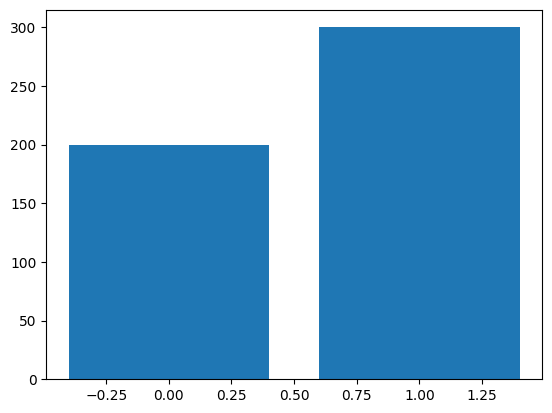

In [ ]:
# Sprawdzenie równoliczności grup
counter_mine = Counter(df_labels['label'])
plt.bar(counter_mine.keys(), counter_mine.values())
print(np.unique(df_labels['label']))

features_scaled.shape

In [ ]:
# Podział danych na cechy (X) i etykietę (y)
X_features = final_df.drop(['label'], axis =1)
y_features = df_labels['label']

# Podział na zestaw treningowy i testowy
from sklearn.model_selection import train_test_split
#set_seeds()
X_features_train, X_features_test, y_features_train, y_features_test = train_test_split(X_features, y_features, test_size=0.2, random_state=42)

# Standaryzacja cech
scaler = StandardScaler()
X_features_train = scaler.fit_transform(X_features_train)
X_features_test = scaler.transform(X_features_test)

In [ ]:
print(np.shape(X_features_train))
print(np.shape(X_features_test))
print(np.shape(y_features_train))
print(np.shape(y_features_test))

print(X_features_test)
print(y_features_test)

(400, 80)
(100, 80)
(400,)
(100,)
[[ 0.01985023  0.98263139 -0.47274942 ...  1.00270344  0.38020388
   1.26228062]
 [-0.19429565  0.71708908  0.31664598 ...  0.04631192 -0.86070526
  -0.82389633]
 [-1.41185681  0.81561789 -1.34062531 ...  1.59698306  0.97092665
   0.90414243]
 ...
 [-0.34629388  1.29224545  0.40617893 ...  0.35824349  0.90778287
  -0.89079456]
 [-2.3323314   1.64006568  1.51158131 ...  0.54278901 -1.39664641
   0.86483757]
 [-1.14084306  0.77676127  0.29778217 ... -0.23077457 -0.00728774
  -1.10879323]]
361    1.0
73     1.0
374    0.0
155    1.0
104    1.0
      ... 
347    0.0
86     1.0
75     1.0
438    0.0
15     1.0
Name: label, Length: 100, dtype: float64


In [ ]:
X_features_train.shape

(400, 80)

In [ ]:
# Budowanie modelu CNN dla= spektrogramów
model_features = Sequential()
# OPCJA 1
# model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X_spec_train.shape[1], X_spec_train.shape[2],1 )))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# OPCJA 2
model_features.add(Conv1D(16, kernel_size=2,strides = 2, activation='relu', padding='same', input_shape=(X_features_train.shape[1],1)))
model_features.add(Dropout(0.3))
model_features.add(Conv1D(32, kernel_size=2, strides = 2, activation='relu'))
model_features.add(Dropout(0.2))
model_features.add(Conv1D(64, kernel_size=2, strides = 2, activation='relu'))
model_features.add(Dropout(0.4))
model_features.add(Conv1D(128, kernel_size=2, strides = 2, activation='relu'))
model_features.add(Flatten())
model_features.add(Dense(128, activation='relu'))
model_features.add(Dropout(0.4))
model_features.add(Dense(64, activation='relu'))
model_features.add(Dense(1, activation='sigmoid'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_features.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

model_features.summary()
len(model_features.weights)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 40, 16)            48        
                                                                 
 dropout_128 (Dropout)       (None, 40, 16)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 20, 32)            1056      
                                                                 
 dropout_129 (Dropout)       (None, 20, 32)            0         
                                                                 
 conv1d_14 (Conv1D)          (None, 10, 64)            4160      
                                                                 
 dropout_130 (Dropout)       (None, 10, 64)            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 5, 128)          

14

In [ ]:
# Trenowanie modelu na mel spektrogramach
history_features = model_features.fit(X_features_train, y_features_train, validation_data=(X_features_test, y_features_test), epochs=30, batch_size=64)

Epoch 1/30
7/7 [==============================] - 3s 49ms/step - loss: 0.6783 - binary_accuracy: 0.6200 - val_loss: 0.6757 - val_binary_accuracy: 0.5800
Epoch 2/30
7/7 [==============================] - 0s 9ms/step - loss: 0.6633 - binary_accuracy: 0.6050 - val_loss: 0.6675 - val_binary_accuracy: 0.5800
Epoch 3/30
7/7 [==============================] - 0s 12ms/step - loss: 0.6631 - binary_accuracy: 0.6100 - val_loss: 0.6560 - val_binary_accuracy: 0.5900
Epoch 4/30
7/7 [==============================] - 0s 9ms/step - loss: 0.6372 - binary_accuracy: 0.6100 - val_loss: 0.6407 - val_binary_accuracy: 0.6700
Epoch 5/30
7/7 [==============================] - 0s 9ms/step - loss: 0.6187 - binary_accuracy: 0.6275 - val_loss: 0.6160 - val_binary_accuracy: 0.6500
Epoch 6/30
7/7 [==============================] - 0s 10ms/step - loss: 0.5776 - binary_accuracy: 0.7075 - val_loss: 0.5831 - val_binary_accuracy: 0.7000
Epoch 7/30
7/7 [==============================] - 0s 9ms/step - loss: 0.5639 - binary

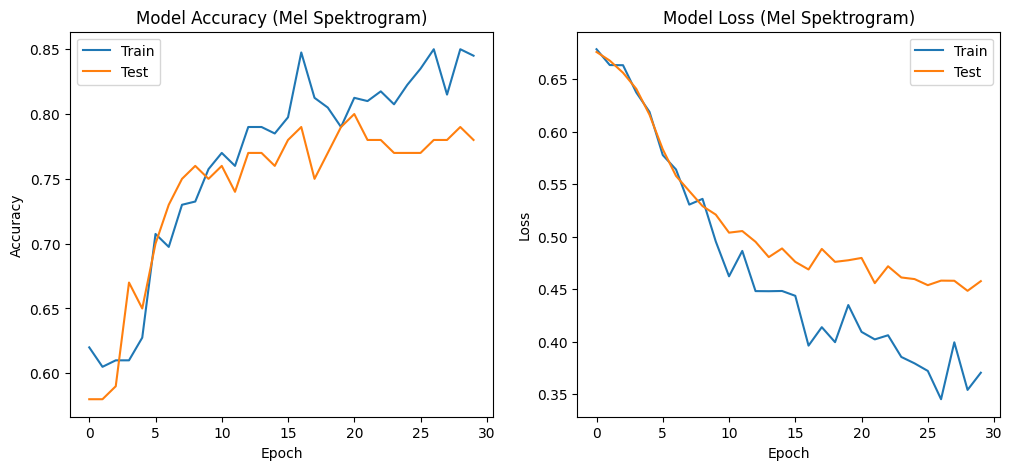

In [ ]:
# Wizualizacja wyników
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_features.history['binary_accuracy'], label='Train')
plt.plot(history_features.history['val_binary_accuracy'], label='Test')
plt.title('Model Accuracy (Mel Spektrogram)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_features.history['loss'], label='Train')
plt.plot(history_features.history['val_loss'], label='Test')
plt.title('Model Loss (Mel Spektrogram)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

4/4 [==============================] - 0s 8ms/step
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]
361    1.0
73     1.0
374    0.0
155    1.0
104    1.0
      ... 
347    0.0
86     1.0
75     1.0
438    0.0
15     1.0
Name: label, Length: 100, dtype: float64
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75        42
         1.0       0.83      0.78      0.80        58

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



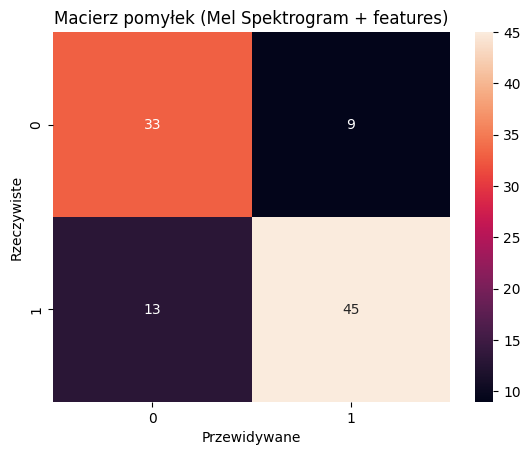

In [ ]:
# Raport klasyfikacji dla mel spektrogramów features
y_pred_features = model_features.predict(X_features_test)

#predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes_features = [1 if prediction > 0.5 else 0 for prediction in y_pred_features]
print(predicted_classes_features)
print(y_features_test)
print(classification_report(y_features_test, predicted_classes_features))


# Macierz pomyłek dla mel spektrogramów
cm_features = confusion_matrix(y_features_test, predicted_classes_features)
sns.heatmap(cm_features, annot=True, fmt='d')
plt.title('Macierz pomyłek (Mel Spektrogram + features)')
plt.ylabel('Rzeczywiste')
plt.xlabel('Przewidywane')
plt.show()

In [ ]:
# Walidacja krzyżowa dla MFCCs

from sklearn.model_selection import KFold

num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs_mel_features = np.concatenate((X_features_train, X_features_test), axis=0)
targets_mel_features = np.concatenate((y_features_train, y_features_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs_mel_features, targets_mel_features):

  # Define the model architecture
  set_seeds()

  model_features = Sequential()
  model_features.add(Conv1D(16, kernel_size=2,strides = 2, activation='relu', padding='same', input_shape=(X_features_train.shape[1],1)))
  model_features.add(Dropout(0.25))
  model_features.add(Conv1D(32, kernel_size=2, strides = 2, activation='relu'))
  model_features.add(Dropout(0.2))
  model_features.add(Conv1D(64, kernel_size=2, strides = 2, activation='relu'))
  model_features.add(Dropout(0.2))
  model_features.add(Conv1D(128, kernel_size=2, strides = 2, activation='relu'))
  model_features.add(Flatten())
  model_features.add(Dense(128, activation='relu'))
  model_features.add(Dropout(0.5))
  model_features.add(Dense(64, activation='relu'))
  model_features.add(Dense(1, activation='sigmoid'))
  adam = tf.keras.optimizers.Adam(learning_rate=0.001)
  model_features.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])

  # Compiling the ANN
  model_features.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])



  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history =  model_features.fit(inputs_mel_features[train], targets_mel_features[train],
              batch_size=64,
              epochs=20,
              verbose=0)

  # Generate generalization metrics
  scores_mel_features = model_features.evaluate(inputs_mel_features[test], targets_mel_features[test], verbose=0)
  print(f'Score for fold {fold_no}: {model_features.metrics_names[0]} of {scores_mel_features[0]}; {model_features.metrics_names[1]} of {scores_mel_features[1]*100}%')
  acc_per_fold.append(scores_mel_features[1] * 100)
  loss_per_fold.append(scores_mel_features[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.44575250148773193; binary_accuracy of 80.0000011920929%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.41347095370292664; binary_accuracy of 86.00000143051147%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.44888320565223694; binary_accuracy of 75.99999904632568%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.2551369071006775; binary_accuracy of 87.99999952316284%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.5174356698989868; binary_accuracy of 74.00000095367432%
------------------------------------------------------------------------
Training for fold 6 

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~